In [26]:
import requests as r
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt

from config2 import API_KEY

In [50]:
#i am using the business dataset
top_stories = r.get(f'https://api.nytimes.com/svc/topstories/v2/business.json?api-key={API_KEY}').content.decode()
print(top_stories)

{"status":"OK","copyright":"Copyright (c) 2024 The New York Times Company. All Rights Reserved.","section":"Business","last_updated":"2024-03-29T10:34:57-04:00","num_results":34,"results":[{"section":"business","subsection":"","title":"Why It’s So Expensive to Live in Phoenix","abstract":"Arizona is a presidential election battleground state, and a dire shortage of affordable housing there is sowing economic anxiety among voters.","url":"https://www.nytimes.com/2024/03/29/business/arizona-housing-economy.html","uri":"nyt://article/2926b0ea-4d61-5cf5-84e5-aaa3dec042d7","byline":"By Peter S. Goodman","item_type":"Article","updated_date":"2024-03-29T11:57:50-04:00","created_date":"2024-03-29T10:33:36-04:00","published_date":"2024-03-29T10:33:36-04:00","material_type_facet":"","kicker":"","des_facet":["Real Estate and Housing (Residential)","Prices (Fares, Fees and Rates)","Affordable Housing","United States Economy","Renting and Leasing (Real Estate)"],"org_facet":[],"per_facet":[],"geo_f

In [51]:
#taking the results of the data and normalizing it to a flat table structure like the dataframe series below to view data we need in a way to be easy to work with
bus = pd.read_json(StringIO(top_stories))
results = pd.json_normalize(bus['results'])
results

,section,subsection,title,abstract,url,uri,byline,item_type,updated_date,created_date,published_date,material_type_facet,kicker,des_facet,org_facet,per_facet,geo_facet,multimedia,short_url
0,business,,Why It’s So Expensive to Live in Phoenix,Arizona is a presidential election battlegroun...,https://www.nytimes.com/2024/03/29/business/ar...,nyt://article/2926b0ea-4d61-5cf5-84e5-aaa3dec0...,By Peter S. Goodman,Article,2024-03-29T11:57:50-04:00,2024-03-29T10:33:36-04:00,2024-03-29T10:33:36-04:00,,,"[Real Estate and Housing (Residential), Prices...",[],[],"[Arizona, Maricopa County (Ariz), Phoenix (Ariz)]",[{'url': 'https://static01.nyt.com/images/2024...,
1,business,,Stock Market Surges to Start the Year: 22 Reco...,"The S&P 500, rising 10 percent, set the pace a...",https://www.nytimes.com/2024/03/29/business/st...,nyt://article/3a6d1d3c-0b94-51f3-9ca4-a607ca88...,By Joe Rennison,Article,2024-03-29T23:45:42-04:00,2024-03-29T05:03:57-04:00,2024-03-29T05:03:57-04:00,,,"[Standard & Poor's 500-Stock Index, Banking an...",[],[],[],[{'url': 'https://static01.nyt.com/images/2024...,
2,business,economy,A Key Inflation Gauge Hovers Above Fed’s Target,The Fed’s preferred inflation gauge climbed 2....,https://www.nytimes.com/2024/03/29/business/ec...,nyt://article/d3c1f39a-f47d-57fe-a575-9065b410...,By Jeanna Smialek,Article,2024-03-29T23:46:32-04:00,2024-03-29T08:40:12-04:00,2024-03-29T08:40:12-04:00,,,"[Prices (Fares, Fees and Rates), Inflation (Ec...","[Federal Reserve System, Commerce Department]",[],[],[{'url': 'https://static01.nyt.com/images/2024...,
3,business,media,‘Every Day Is Hard’: One Year Since Russia Jai...,"In a notorious high-security prison, Evan Gers...",https://www.nytimes.com/2024/03/29/business/me...,nyt://article/075a692f-f168-58e5-9a1e-48dbbad2...,By Katie Robertson,Article,2024-03-29T22:29:51-04:00,2024-03-29T00:00:44-04:00,2024-03-29T00:00:44-04:00,,,"[United States International Relations, News a...",[Wall Street Journal],"[Gershkovich, Evan]",[Russia],[{'url': 'https://static01.nyt.com/images/2024...,
4,business,,San Francisco’s ‘Twitter Menace’ or True Belie...,The deep pockets of the tech investor Garry Ta...,https://www.nytimes.com/2024/03/29/business/ga...,nyt://article/586cf840-93ce-5a67-9f07-2c8f862e...,By Heather Knight,Article,2024-03-29T21:39:02-04:00,2024-03-29T05:01:04-04:00,2024-03-29T05:01:04-04:00,,,"[Content Type: Personal Profile, Computers and...","[Democratic Party, Y Combinator]","[Tan, Garry, Peskin, Aaron, Melgar, Myrna]",[San Francisco (Calif)],[{'url': 'https://static01.nyt.com/images/2024...,
5,business,,Those Billion-Dollar Lottery ‘Jackpots’ Aren’t...,The latest enticing lottery prizes are the pro...,https://www.nytimes.com/2024/03/29/business/lo...,nyt://article/67110545-e236-5ba1-8d83-aa51b1a4...,By Jeff Sommer,Article,2024-03-29T21:03:14-04:00,2024-03-29T05:03:31-04:00,2024-03-29T05:03:31-04:00,,Strategies,"[Gambling, Advertising and Marketing, Governme...",[Multi-State Lottery Assn],[],[],[{'url': 'https://static01.nyt.com/images/2024...,
6,business,,How the Israel-Hamas War Has Roiled TikTok Int...,The video app has been criticized for how it h...,https://www.nytimes.com/2024/03/28/business/ti...,nyt://article/971f487c-a3bc-580a-86f0-5cd14099...,By Sapna Maheshwari,Article,2024-03-29T10:38:55-04:00,2024-03-28T15:32:22-04:00,2024-03-28T15:32:22-04:00,,,"[Social Media, Anti-Semitism, Israel-Gaza War ...","[TikTok (ByteDance), Beijing Bytedance Technol...",[],"[Israel, Gaza Strip]",[{'url': 'https://static01.nyt.com/images/2024...,
7,business,,‘Shortcuts Everywhere’: How Boeing Favored Spe...,Problems have plagued the manufacturer even af...,https://www.nytimes.com/2024/03/28/business/bo...,nyt://article/52924ee3-f433-5e93-bafc-a8e2660b...,"By Niraj Chokshi, Sydney Ember and Santul Nerkar",Article,2024-03-29T10:36:12-04:00,2024-03-28T05:02:14-04:00,2024-03-28T05:02:14-04:00,,,[Boeing 737 Max Groundings and Safety Concerns...,[Boeing Company],[],[],[{'url': 'https://static01.nyt.com/i

In [66]:
#we take the column and take what we need, using .head will give us the top 10 more frequent keywords
keywords = results['des_facet'].explode()
keywords = keywords.value_counts().head(10)
keywords

United States Politics and Government    5
Prices (Fares, Fees and Rates)           5
United States Economy                    4
Interest Rates                           4
Credit Cards                             3
Inflation (Economics)                    3
Personal Finances                        3
High Net Worth Individuals               3
Computers and the Internet               3
News and News Media                      3
Name: des_facet, dtype: int64

In [68]:
#this creates it into a table that is usable to be plotted with x and y 
keywords = keywords.reset_index()

keywords

,index,des_facet
0,United States Politics and Government,5
1,"Prices (Fares, Fees and Rates)",5
2,United States Economy,4
3,Interest Rates,4
4,Credit Cards,3
5,Inflation (Economics),3
6,Personal Finances,3
7,High Net Worth Individuals,3
8,Computers and the Internet,3
9,News and News Media,3


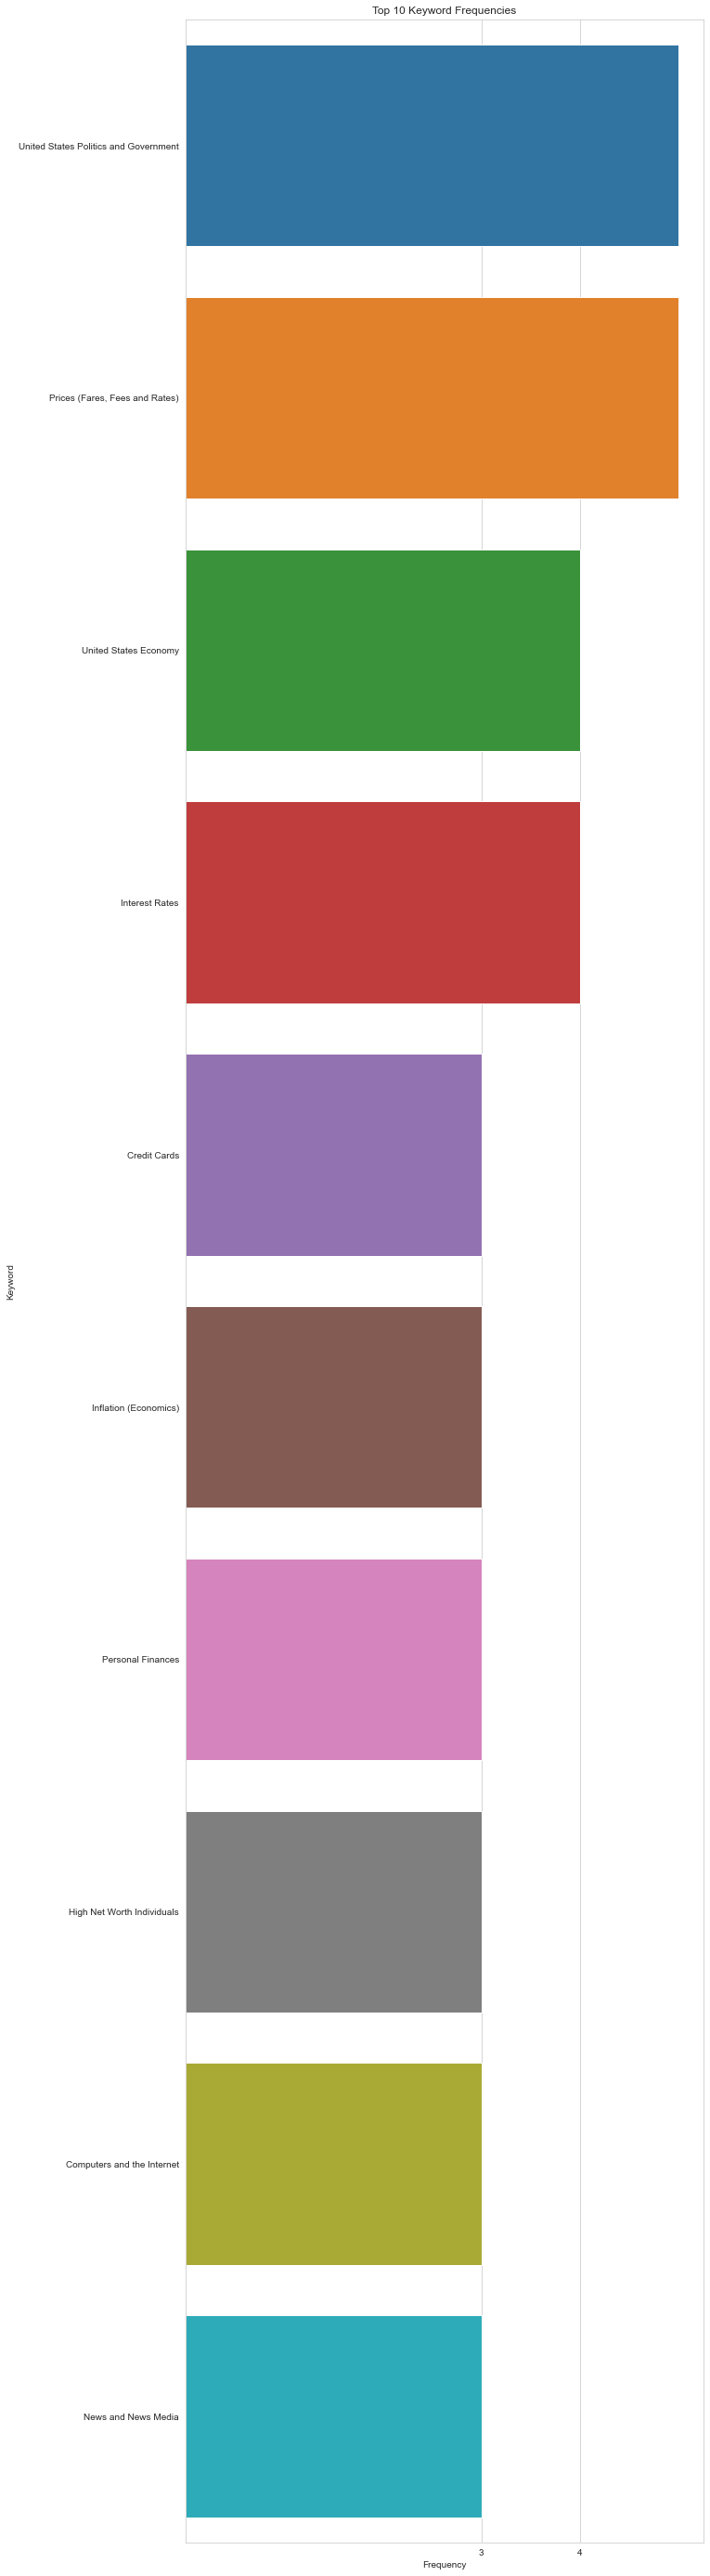

In [70]:
# Create our chart
sns.set_style("whitegrid")

plt.figure(figsize=(10, 50))
plt.xticks(range(min(keywords['des_facet']),max(keywords['des_facet'])))
sns.barplot(x='des_facet', y='index', data=keywords, ci=None)

plt.title('Top 10 Keyword Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Keyword')

plt.show()

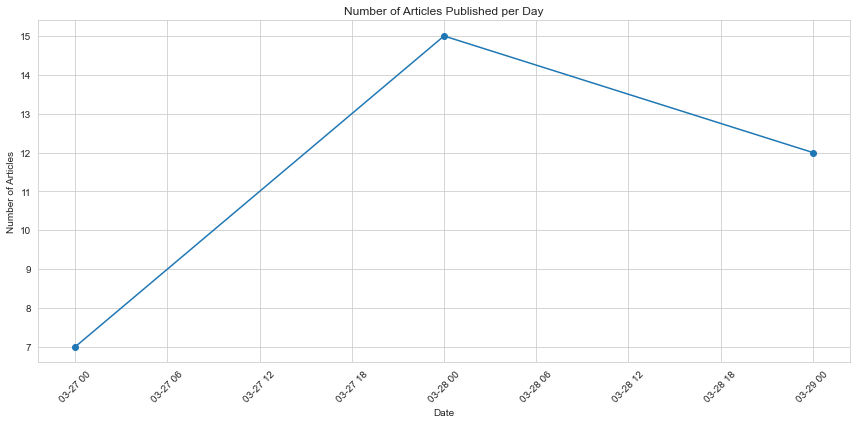

In [81]:
#doing the same thing as keywords but with dates 
results['published_date'] = pd.to_datetime(results['published_date'])

#grop by day and count the number of articles
articles_per_day = results.groupby(results['published_date'].dt.date).size()

# Create a line graph
plt.figure(figsize=(12, 6))
plt.plot(articles_per_day.index, articles_per_day.values, marker='o')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.title('Number of Articles Published per Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()